In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import root_mean_squared_error

In [4]:
#читаем данные и переводим их в массив для удобства работы
rhob_10 = pd.read_csv('rhob_10.csv', header=None).to_numpy()
rhob_30 = pd.read_csv('rhob_30.csv', header=None).to_numpy()
rhob_50 = pd.read_csv('rhob_50.csv', header=None).to_numpy()

In [5]:
#проверяем длину массивов для создания массива глубин необходимой длины
rhob_10.shape, rhob_30.shape, rhob_50.shape

((100, 1), (100, 1), (100, 1))

In [6]:
#создадим произвольные глубины снятия каротажа, так как в исходных данных их нет
depth = np.arange(1500, 1600, 1)

Визуализируем кривые плотностоного каротажа

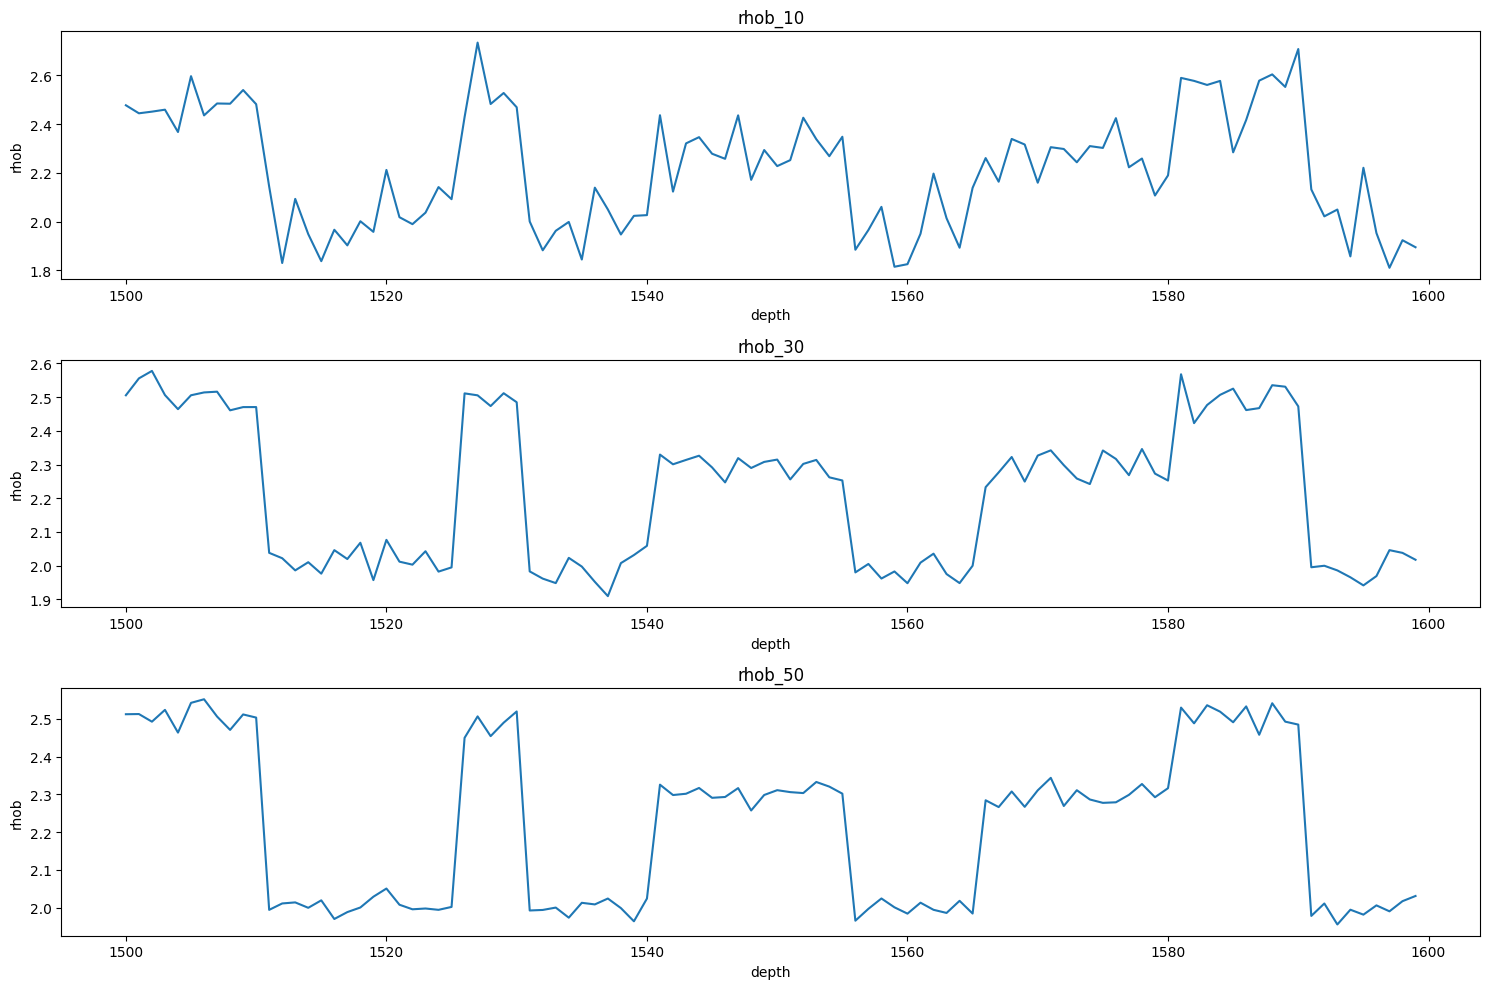

In [7]:
rhobs = [rhob_10, rhob_30, rhob_50]
rhob_names = ['rhob_10', 'rhob_30', 'rhob_50']

fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for ax, rhob, rhob_name  in zip(axes, rhobs, rhob_names):
    ax.plot(depth, rhob)
    ax.set_xlabel('depth')
    ax.set_ylabel('rhob')
    ax.set_title(rhob_name)
    
plt.tight_layout()


Видно, что у rhob_30 и rhob_50 хорошо выделяются три уровня
Запись rhob_10 зашумлена, но также выделяется примерно 3 уровня

Для решения задачи будем использовать метод K-Means Clustering из библиотеки sklearn

Предлагаемый алгоритм для решения задачи:

- разбить имеющиеся данные на n частей так, чтобы сумма дисперсий данных в каждой части была минимальной, в каждой из частей найти среднее значение, которое будет аппроксимировать заданный интервал

По сути K-Means Clustering делает тоже самое:
- выбираем количество частей n разбиения данных
- случайным образом выбираем K точек данных в качестве центроидов кластеров (аналог первичного выбора точек, разделяющих уровни)
- классифицируем данные на основе евклидова расстояния до одного из кластеров (эквивалетно минимизации суммы дисперсий)
- обновляем центроиды в каждом кластере, вычисляя среднее значение точек данных (вычисляем искомый осредняющий уровень)

In [8]:
def data_partitioning(data, n_levels):
    km = KMeans(n_clusters=n_levels, random_state=42)
    km.fit(data)
    approx_data = km.predict(data)
    level_mean = km.cluster_centers_.flatten()
    return np.array([level_mean[i] for i in approx_data])

Первый уровень приближения - среднее значение

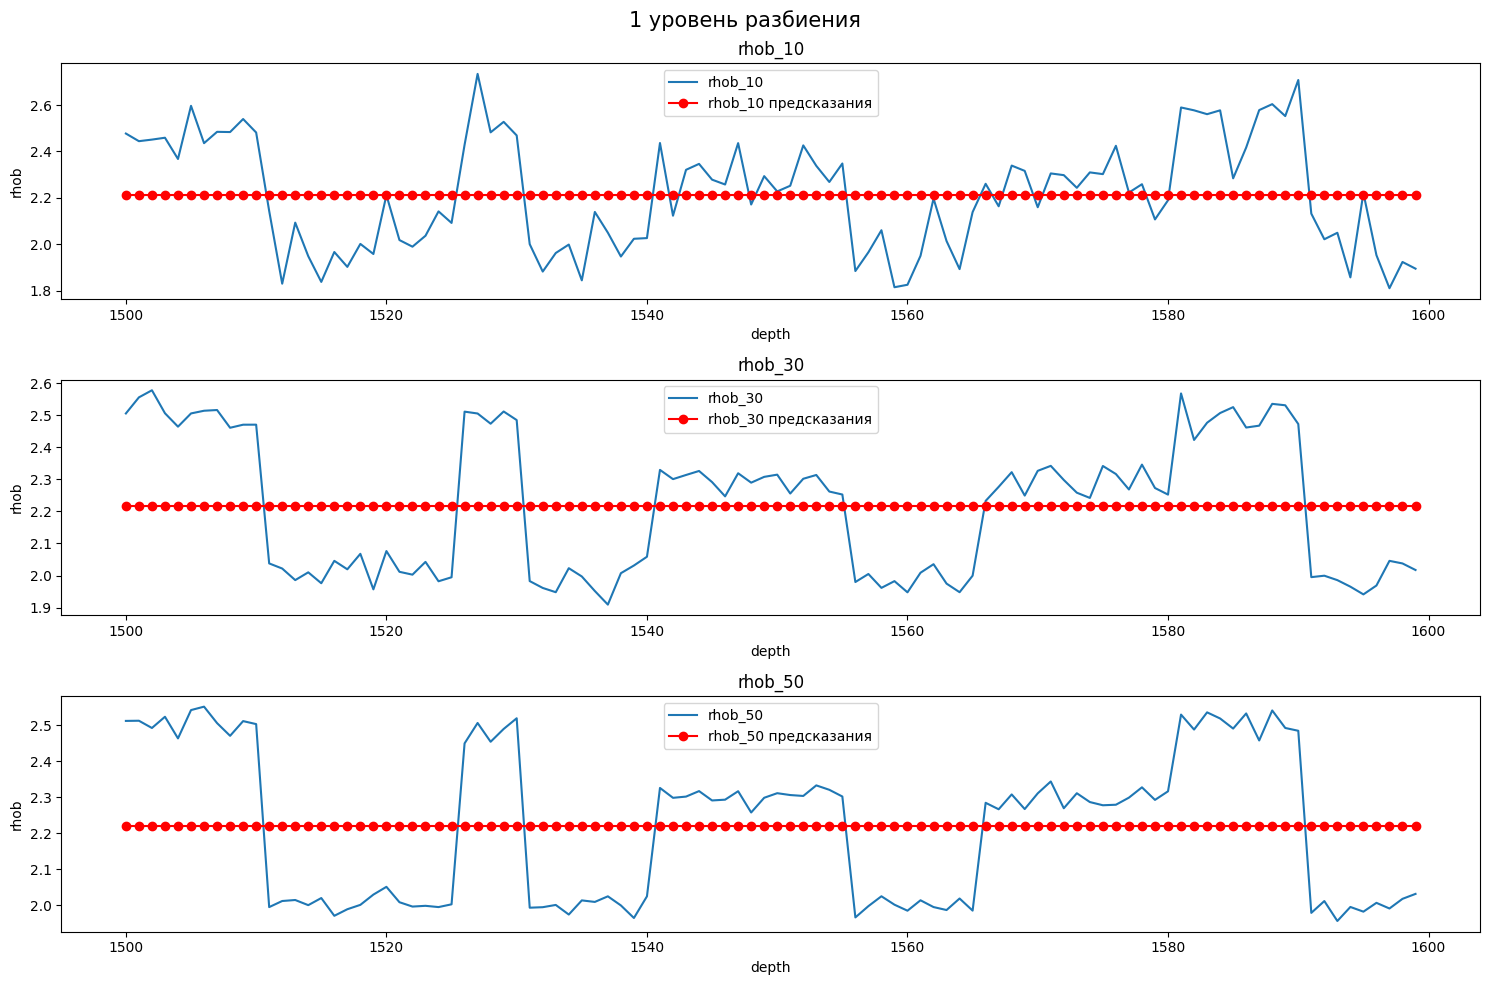

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for ax, rhob, rhob_name  in zip(axes, rhobs, rhob_names):
    ax.plot(depth, rhob, label=rhob_name)
    ax.plot(depth, data_partitioning(rhob, 1), c='r', marker='o', label=rhob_name + ' предсказания')
    ax.set_xlabel('depth')
    ax.set_ylabel('rhob')
    ax.set_title(rhob_name)
    ax.legend()
plt.suptitle('1 уровень разбиения', size=15)    
plt.tight_layout()

Второй уровень приблежения - разбиваем данные на 2 части

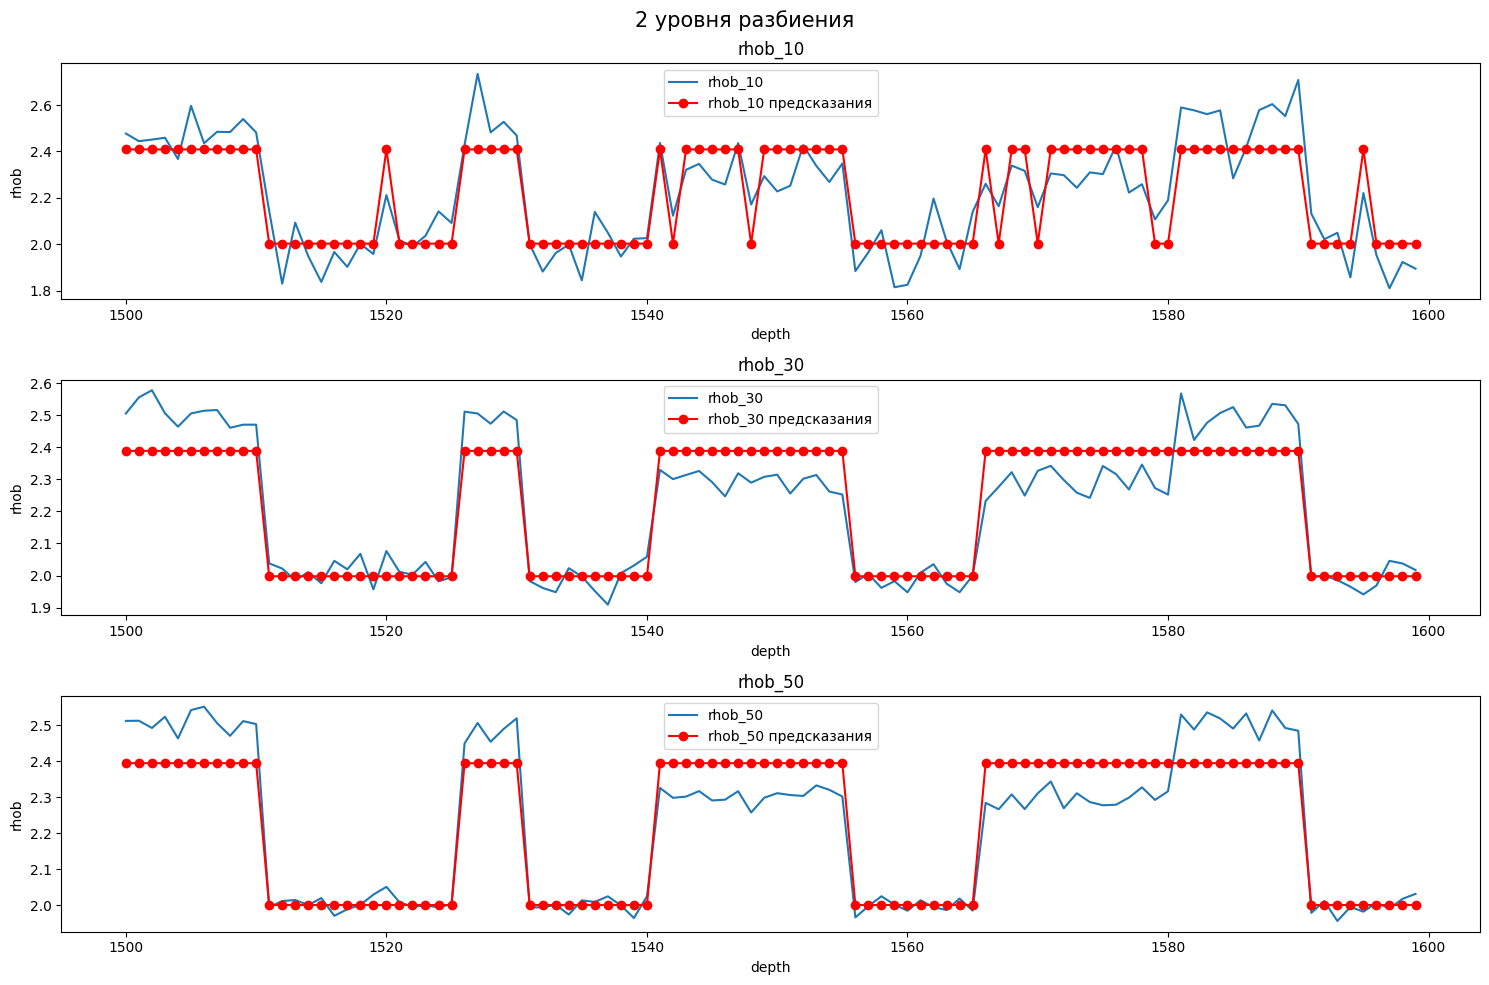

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for ax, rhob, rhob_name  in zip(axes, rhobs, rhob_names):
    ax.plot(depth, rhob, label=rhob_name)
    ax.plot(depth, data_partitioning(rhob, 2), c='r', marker='o', label=rhob_name + ' предсказания')
    ax.set_xlabel('depth')
    ax.set_ylabel('rhob')
    ax.set_title(rhob_name)
    ax.legend()
plt.suptitle('2 уровня разбиения', size=15)    
plt.tight_layout()

Третий уровень приблежения - разбиваем данные на 3 части

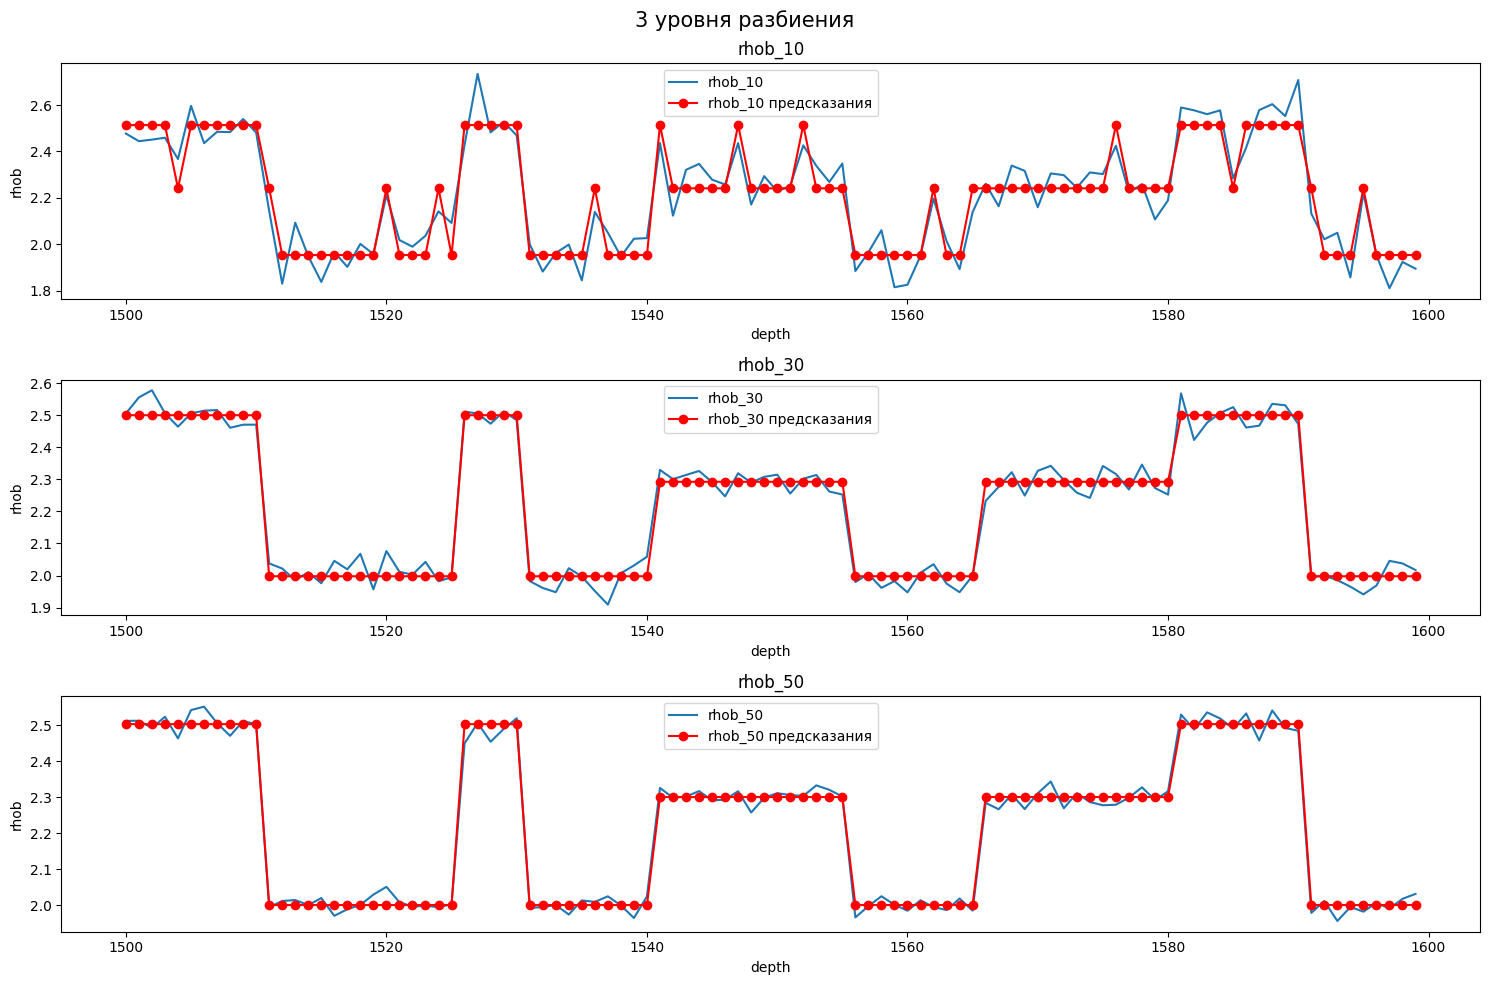

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for ax, rhob, rhob_name  in zip(axes, rhobs, rhob_names):
    ax.plot(depth, rhob, label=rhob_name)
    ax.plot(depth, data_partitioning(rhob, 3), c='r', marker='o', label=rhob_name + ' предсказания')
    ax.set_xlabel('depth')
    ax.set_ylabel('rhob')
    ax.set_title(rhob_name)
    ax.legend()
plt.suptitle('3 уровня разбиения', size=15)    
plt.tight_layout()

Визуально видно, что третий уровень приближения хорошо подходит для всех кривых. 
Посмотрим, ради интереса, как будут выглядеть приближения для больших уровней

Четвертый уровень приблежения - разбиваем данные на 4 части

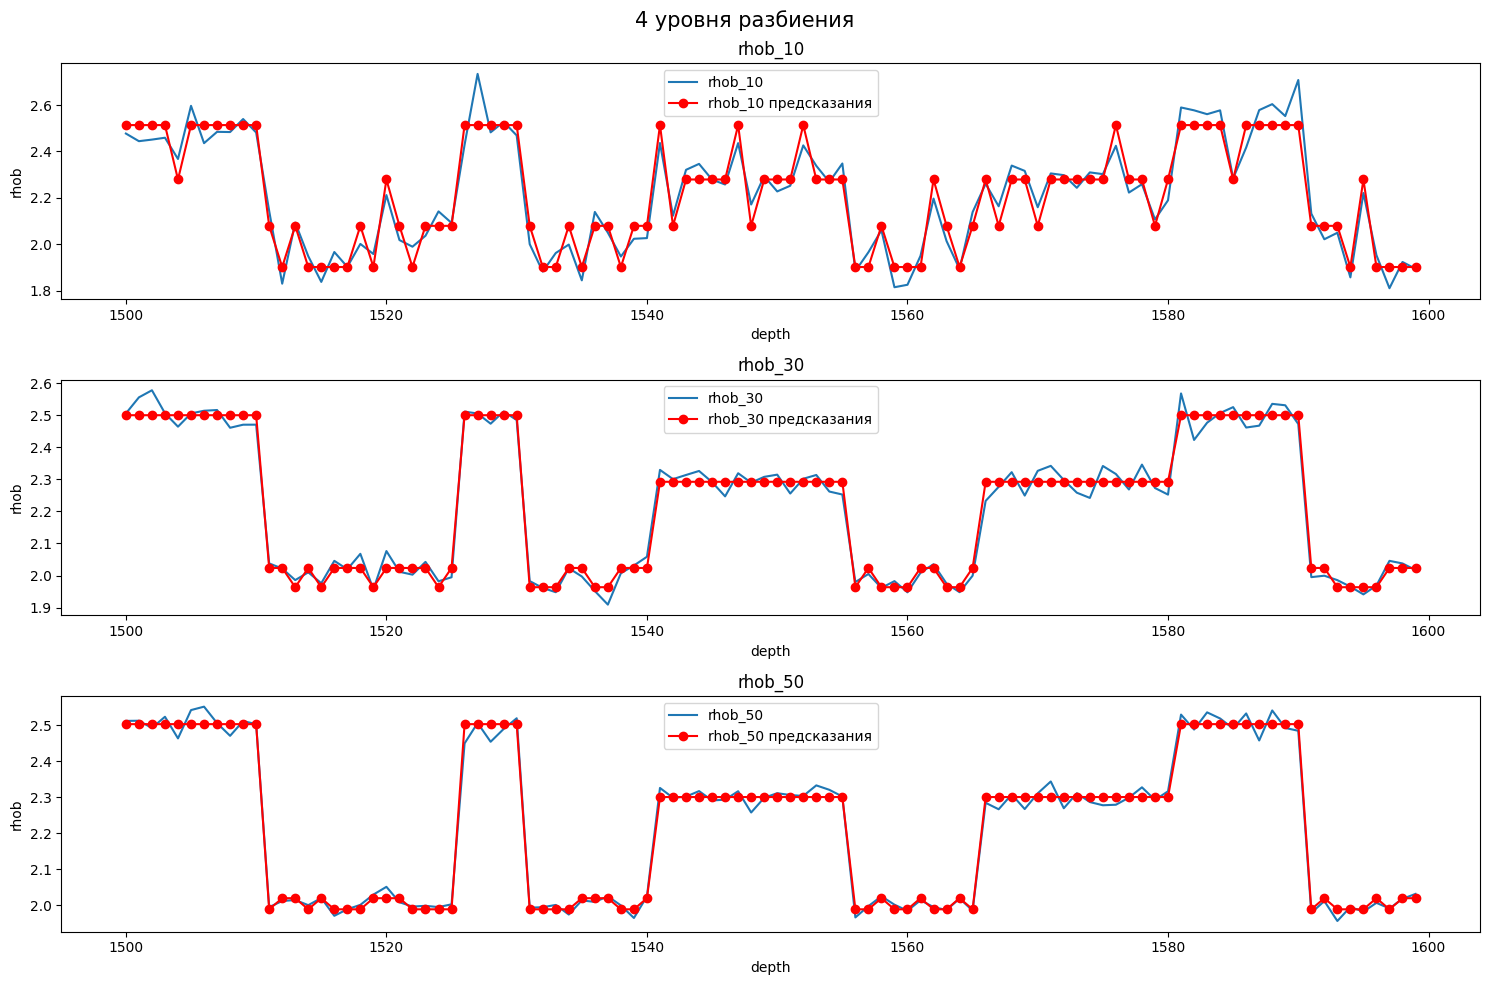

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for ax, rhob, rhob_name  in zip(axes, rhobs, rhob_names):
    ax.plot(depth, rhob, label=rhob_name)
    ax.plot(depth, data_partitioning(rhob, 4), c='r', marker='o', label=rhob_name + ' предсказания')
    ax.set_xlabel('depth')
    ax.set_ylabel('rhob')
    ax.set_title(rhob_name)
    ax.legend()
plt.suptitle('4 уровня разбиения', size=15)    
plt.tight_layout()

Пятый уровень приближения - разобьем данные на 5 частей

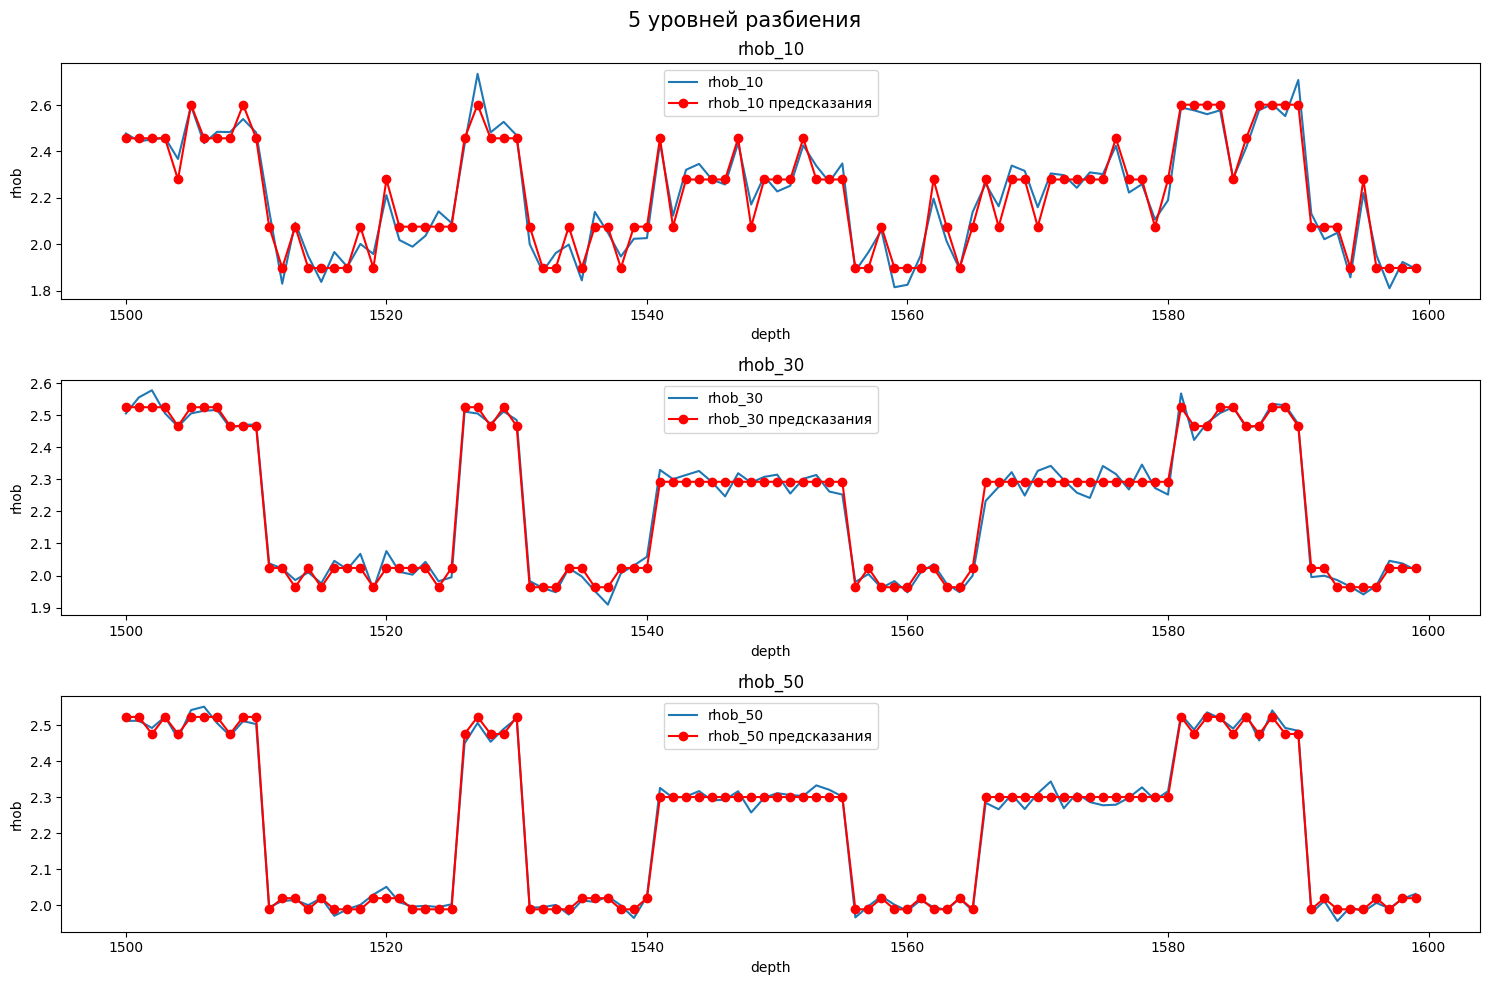

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for ax, rhob, rhob_name  in zip(axes, rhobs, rhob_names):
    ax.plot(depth, rhob, label=rhob_name)
    ax.plot(depth, data_partitioning(rhob, 5), c='r', marker='o', label=rhob_name + ' предсказания')
    ax.set_xlabel('depth')
    ax.set_ylabel('rhob')
    ax.set_title(rhob_name)
    ax.legend()
plt.suptitle('5 уровней разбиения', size=15)    
plt.tight_layout()

Уровни 4 и 5, очевидно, начинают подстаиваться под шум записей

Отобразим, как изменяется отклонение от среднего в зависимости от количества уровней разбиения

In [14]:
err_rhob_10 = [root_mean_squared_error(rhob_10,  data_partitioning(rhob_10, i)) for i in range(1, 6)]
err_rhob_30 = [root_mean_squared_error(rhob_30,  data_partitioning(rhob_30, i)) for i in range(1, 6)]
err_rhob_50 = [root_mean_squared_error(rhob_50,  data_partitioning(rhob_50, i)) for i in range(1, 6)]

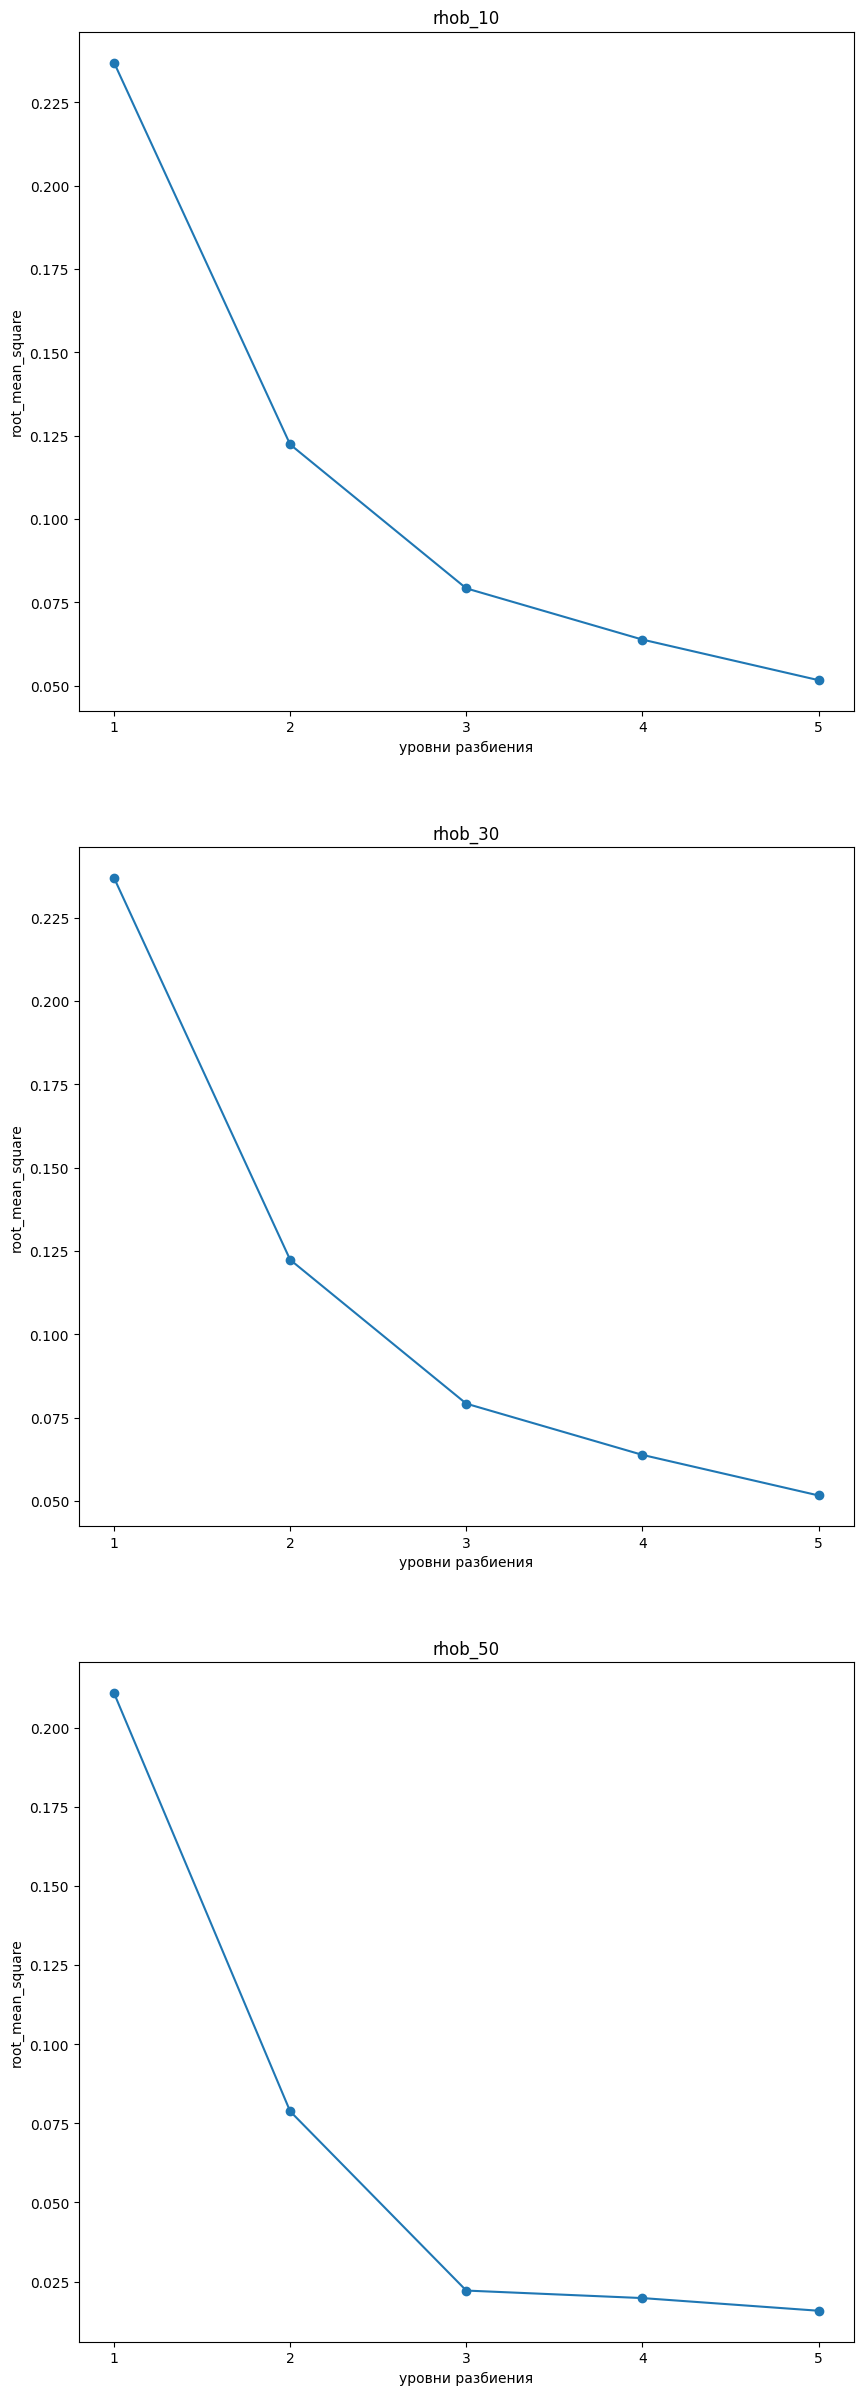

In [15]:
err_rhobs = [err_rhob_10, err_rhob_10, err_rhob_50]
x_values = range(1, 6)

fig, axes = plt.subplots(3, 1, figsize=(10, 30))

for ax, err_rhob, rhob_name  in zip(axes, err_rhobs, rhob_names):
    ax.plot(x_values, err_rhob, label=rhob_name, marker='o')
    ax.set_xlabel('уровни разбиения')
    ax.set_ylabel('root_mean_square')
    ax.set_xticks(x_values)
    ax.set_title(rhob_name)
   

Наши первичный визуальный осморт графиков оказался верным: разбиение на 3 уровня оптимально для всех кривых rhob